In [22]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os

In [27]:
# ======== USER INPUT HERE ========
file_a = r"merged_PET.gr" #component a
file_b = r"merged_solution.gr" #component b
file_c = r"merged_PET_sol.gr" #target file
data_dir = r"C:\Users\chen\Desktop\PDF"  # Update this if needed

# Select fitting range
x_min, x_max = 1.0, 10


# ================================

In [28]:
def load_gr_file(filepath, skiprows=26):
    """Load a .gr file and return x and y numpy arrays."""
    df = pd.read_csv(filepath, skiprows=skiprows, delim_whitespace=True, header=None)
    x = df[0].values
    y = df[1].values
    return x, y

def select_range(x, y, xmin, xmax):
    """Select y values where x is between xmin and xmax."""
    mask = (x >= xmin) & (x <= xmax)
    return x[mask], y[mask]

def linear_combination_fit(a, b, c):
    """Find optimal weights to best fit c using a linear combination of a and b."""
    def objective(weights):
        w1, w2 = weights
        return np.sum((w1 * a + w2 * b - c) ** 2)

    constraints = {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1}
    bounds = [(0, 1), (0, 1)]
    initial = [0.5, 0.5]

    result = minimize(objective, initial, bounds=bounds, constraints=constraints)
    return result.x, result.fun

def plot_fit(x, y_a, y_b, c, w1, w2, residual_offset=0.02):
    """Plot target vs. fit and residuals with optional vertical offset."""
    fit = w1 * y_a + w2 * y_b
    residual = c - fit

    plt.figure(figsize=(8, 5))

    # Plot target and fit
    plt.plot(x, c, label="Target (c)", color="black")
    plt.plot(x, fit, '--', label=f"Fit = {w1:.3f}·a + {w2:.3f}·b", color="red")

    # Plot residuals with offset
    plt.plot(x, residual + residual_offset, ':', color="blue", label=f"Residual (c - fit) + {residual_offset}")

    plt.xlabel("x")
    plt.ylabel("Intensity")
    plt.title("Linear Combination Fit with Residual")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def save_fit_csv(x, c, fit, file_c, data_dir):
    """Save the target and fitted data to a CSV file."""
    df_out = pd.DataFrame({
        "x": x,
        "target_c": c,
        "fitted": fit
    })
    output_csv = os.path.join(data_dir, f"{Path(file_c).stem}_fit_result.csv")
    df_out.to_csv(output_csv, index=False)
    print(f"Fitted data saved to: {output_csv}")
    return output_csv

In [29]:
# Load data
x_a, y_a = load_gr_file(os.path.join(data_dir, file_a))
x_b, y_b = load_gr_file(os.path.join(data_dir, file_b))
x_c, y_c = load_gr_file(os.path.join(data_dir, file_c))

# Apply x-range selection
x_fit, a_fit = select_range(x_a, y_a, x_min, x_max)
_,     b_fit = select_range(x_b, y_b, x_min, x_max)
_,     c_fit = select_range(x_c, y_c, x_min, x_max)

# Fit
(weights, error) = linear_combination_fit(y_a, y_b, y_c)
w1, w2 = weights
fit = w1 * y_a + w2 * y_b




Optimal weights:
  w1 (a) = 0.6493
  w2 (b) = 0.3507
Sum of squared residuals: 2.1257e-01


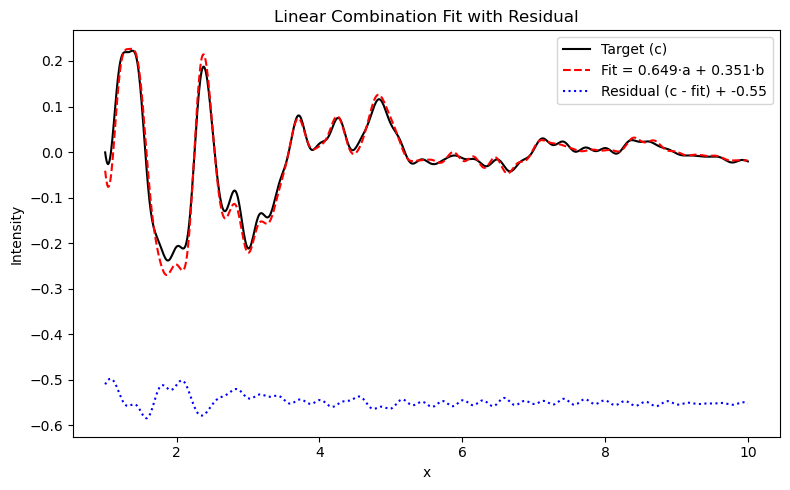

In [30]:
# Output results
print(f"\nOptimal weights:\n  w1 (a) = {w1:.4f}\n  w2 (b) = {w2:.4f}")
print(f"Sum of squared residuals: {error:.4e}")

# Plot (inline only)
plot_fit(x_fit, a_fit, b_fit, c_fit, w1, w2, residual_offset=-0.55)


Optimal weights:
  w1 (a) = 0.6614
  w2 (b) = 0.3386
Sum of squared residuals: 8.0912e-01


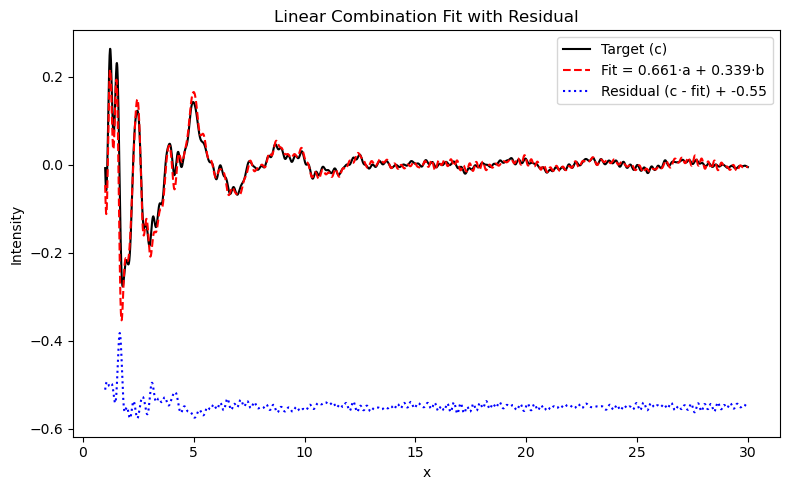

In [21]:
# Output results
print(f"\nOptimal weights:\n  w1 (a) = {w1:.4f}\n  w2 (b) = {w2:.4f}")
print(f"Sum of squared residuals: {error:.4e}")

# Plot (inline only)
plot_fit(x_fit, a_fit, b_fit, c_fit, w1, w2, residual_offset=-0.55)